In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv('customer_data.csv')

In [4]:
df['Churn']=np.where(df['Churn']=='Yes',1,0)

In [5]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
0,0.128721,37.569965,61.265124
1,0.254682,17.979133,74.441332


In [63]:
df['TotalCharges']=np.where(df['TotalCharges']==' ',df.MonthlyCharges,df.TotalCharges)

In [64]:
df.TotalCharges=df.TotalCharges.astype(float)

In [7]:
print df.TotalCharges.idxmax()
print df.TotalCharges.idxmin()

4610
1654


In [8]:
print df.MonthlyCharges.idxmax()
print df.MonthlyCharges.idxmin()

4586
3719


In [65]:
del df['customerID']

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [77]:
df=pd.get_dummies(df)

In [12]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [78]:
df.shape

(7043, 46)

In [88]:
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [79]:
X=df.ix[:,df.columns != 'Churn']


In [80]:
X=X.values

In [82]:
X.shape

(7043, 45)

In [83]:
y=df['Churn']

In [84]:
y.shape

(7043,)

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [86]:
X_train.shape

(5282, 45)

In [87]:
y_train.shape

(5282,)

# Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
logreg=LogisticRegression()

In [91]:
scores=cross_val_score(logreg,X_train,y_train)

In [92]:
print ("Cross validation scores {} ".format(scores))

Cross validation scores [ 0.80136209  0.79545455  0.8       ] 


### By default cv will perform 3 fold cross validation

In [93]:
scores=cross_val_score(logreg,X_train,y_train,cv=5)

In [98]:
print ("Cross validation scores {} ".format(scores))
print ("Avg. cross validation scores : {} ".format(scores.mean()))

Cross validation scores [ 0.80416272  0.79375591  0.79829545  0.80681818  0.79545455] 
Avg. cross validation scores : 0.799697363894 


In [23]:
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
logr.score(X_test,y_test)

0.8063600227143668

In [25]:
logr.score(X_train,y_train)

0.80821658462703516

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
predicted=logr.predict(X_test)

In [28]:
print confusion_matrix(y_test,predicted)

[[1152  125]
 [ 216  268]]


In [29]:
print classification_report(y_test,predicted)

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1277
          1       0.68      0.55      0.61       484

avg / total       0.80      0.81      0.80      1761



In [30]:
#import mglearn
import mglearn

In [31]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


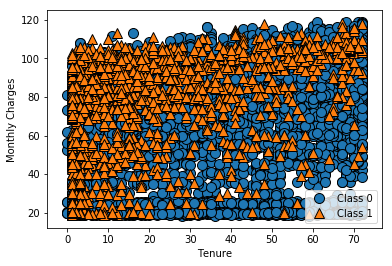

In [32]:
# #plot the classes 
X=pd.DataFrame(X)
mglearn.discrete_scatter(X['tenure'].values,X['MonthlyCharges'].values,y.values)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")


In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
clf=KNeighborsClassifier()

In [101]:
clf_scores=cross_val_score(clf,X_train,y_train,cv=10)

In [102]:
print ("Cross validation scores for KNN : {}".format(clf_scores))

Cross validation scores for KNN : [ 0.75614367  0.75992439  0.75992439  0.7826087   0.75047259  0.75
  0.76136364  0.76470588  0.74193548  0.75901328]


In [33]:

clf=KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
clf.score(X_test,y_test)

0.76206700738216926

In [35]:
predicted_clf=clf.predict(X_test)

In [36]:
print confusion_matrix(y_test,predicted_clf)
print classification_report(y_test,predicted_clf)

[[1129  148]
 [ 271  213]]
             precision    recall  f1-score   support

          0       0.81      0.88      0.84      1277
          1       0.59      0.44      0.50       484

avg / total       0.75      0.76      0.75      1761



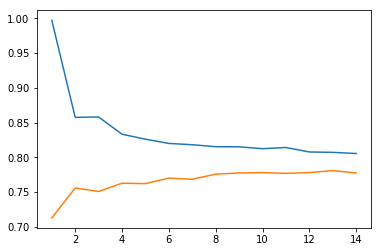

In [37]:
training_accuracy=[]
test_accuracy=[]
neighbours_settings=range(1,15)
for n in neighbours_settings:
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbours_settings,training_accuracy)
plt.plot(neighbours_settings,test_accuracy)
plt.show()

In [103]:
from sklearn.svm import LinearSVC

In [104]:
svc=LinearSVC()
svc_scores=cross_val_score(svc,X_train,y_train,cv=10)
print ("CV score of SVC : {}".format(svc_scores))

CV score of SVC : [ 0.79017013  0.78449905  0.48393195  0.61625709  0.74858223  0.74242424
  0.59659091  0.77798861  0.62428843  0.65654649]


In [38]:
#Linear SVM
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(X_train,y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [39]:
svc.score(X_test,y_test)

0.75979557069846682

In [40]:
print confusion_matrix(y_test,svc.predict(X_test))

[[1242   35]
 [ 388   96]]


In [41]:
print classification_report(y_test,svc.predict(X_test))

             precision    recall  f1-score   support

          0       0.76      0.97      0.85      1277
          1       0.73      0.20      0.31       484

avg / total       0.75      0.76      0.71      1761



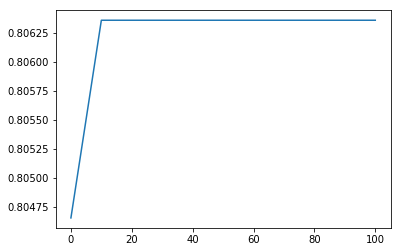

In [42]:
C=[0.001,10,100]
test_accuracy=[]
for i in C:
    logr=LogisticRegression(C=i)
    logr.fit(X_train,y_train)
    test_accuracy.append(logr.score(X_test,y_test))
plt.plot(C,test_accuracy)

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=4)

In [44]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
tree.score(X_test,y_test)

0.7910278250993753

In [46]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["remain", "churn"],
                feature_names=X.columns, impurity=False, filled=True)

In [47]:
# import graphviz

# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [48]:
from pylab import rcParams
plt.rcParams["figure.figsize"] = (20,20)

In [49]:
def plot_feature_importance(model):
    n_features=X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.show()
  
    


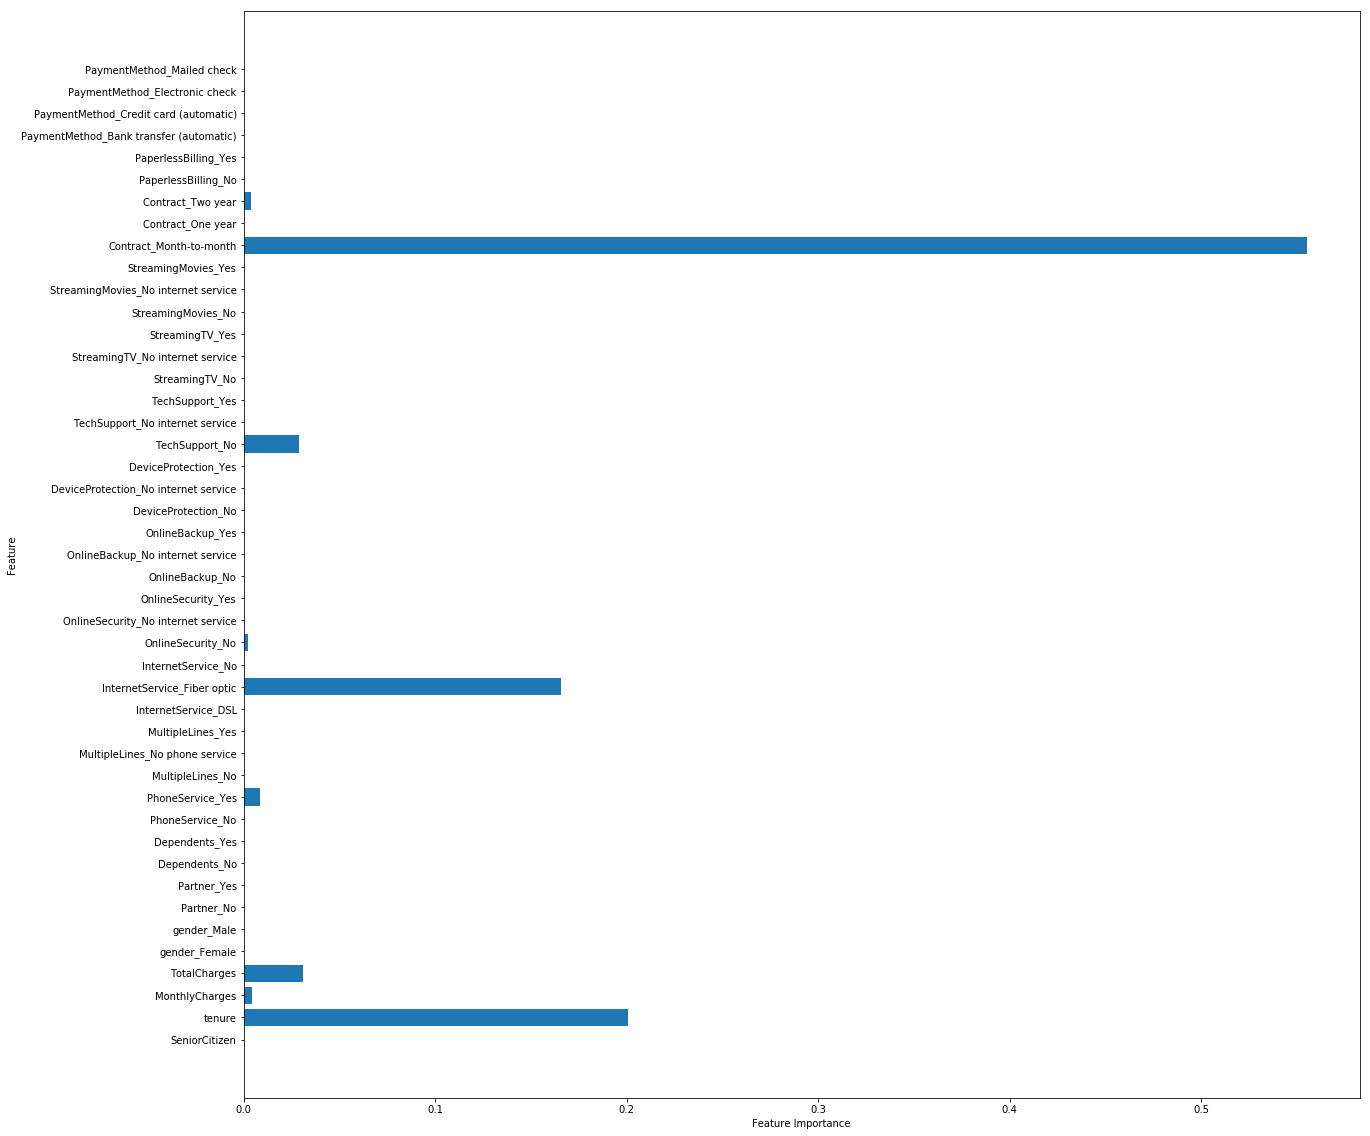

In [50]:
plot_feature_importance(tree)

In [105]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf=RandomForestClassifier()
rf_scores=cross_val_score(rf,X_train,y_train,cv=10)
print ("CV scores for RF :{}".format(rf_scores))


CV scores for RF :[ 0.77693762  0.75047259  0.7826087   0.79395085  0.77126654  0.77840909
  0.75757576  0.77419355  0.79127135  0.77798861]


C:\Users\psi135\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


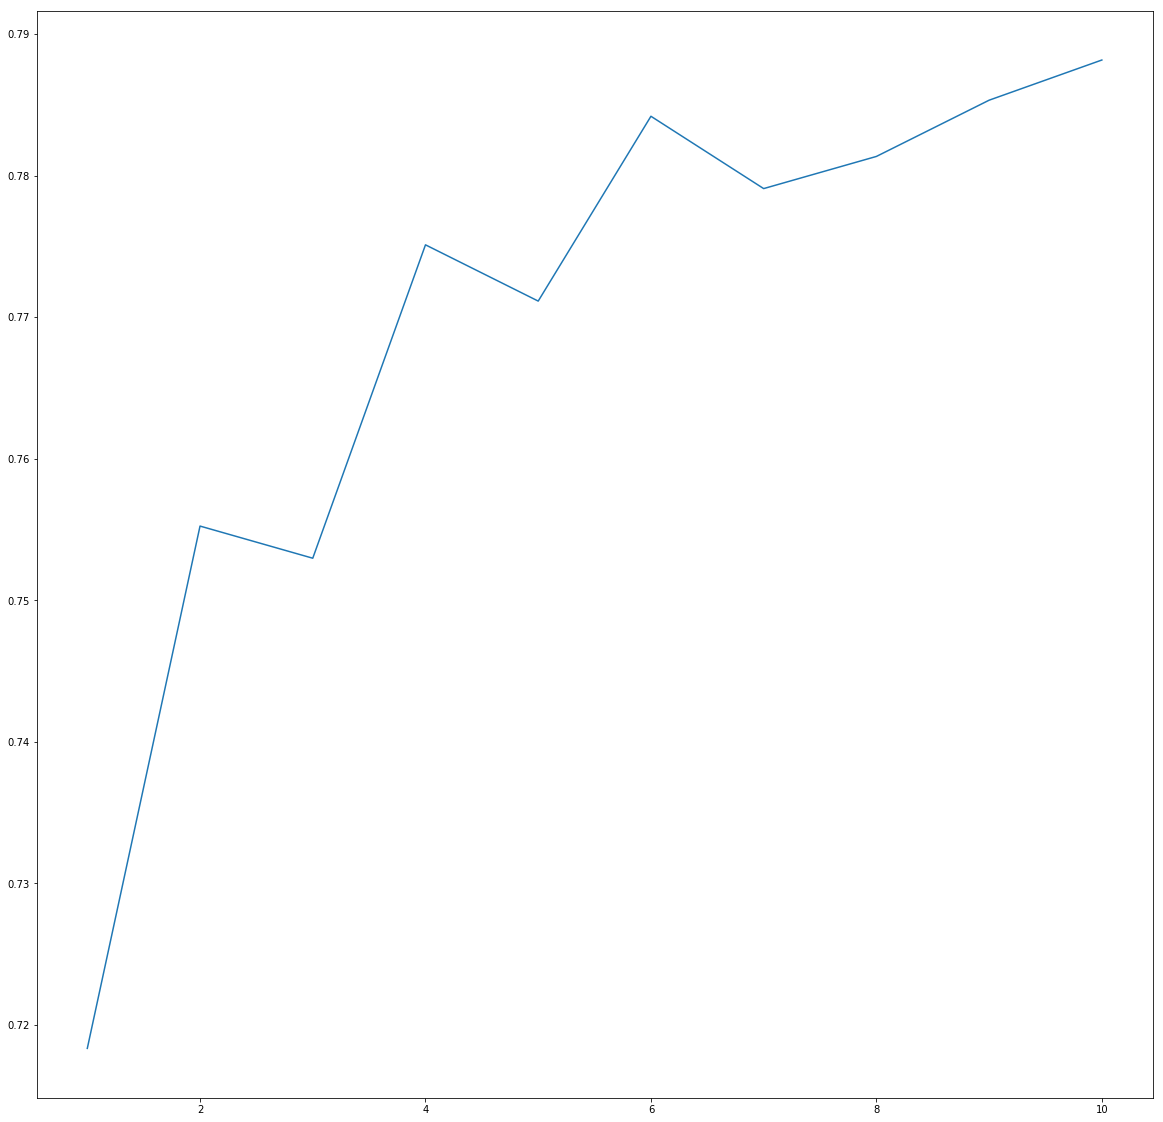

In [52]:
estimators=range(1,11)
train_accuracy=[]
test_accuracy=[]
for i in estimators:
    rf=RandomForestClassifier(n_estimators=i,random_state=100)
    rf.fit(X_train,y_train)
    train_accuracy.append(rf.score(X_train,y_train))
    test_accuracy.append(rf.score(X_test,y_test))
#plt.plot(estimators,train_accuracy)
plt.plot(estimators,test_accuracy)
plt.legend()

In [53]:
ran_f=RandomForestClassifier(n_estimators=15).fit(X_train,y_train)

In [54]:
ran_f=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

In [55]:
ran_f.score(X_test,y_test)

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [ ]:
print confusion_matrix(y_test,rf.predict(X_test))

In [ ]:
plot_feature_importance(rf)

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
gbrt=GradientBoostingClassifier()


In [109]:
gbrt_cv=cross_val_score(gbrt,X_train,y_train,cv=10)

In [110]:
print ("CV scores for gradient boosted trees :{}".format(gbrt_cv))

CV scores for gradient boosted trees :[ 0.80718336  0.81285444  0.80151229  0.81285444  0.8147448   0.80681818
  0.79545455  0.81024668  0.81593928  0.77039848]


In [ ]:
gbrt.score(X_train,y_train)

In [ ]:
gbrt.score(X_test,y_test)

In [ ]:
print confusion_matrix(y_test,gbrt.predict(X_test))
print classification_report(y_test,gbrt.predict(X_test))

In [ ]:
gbrt=GradientBoostingClassifier(learning_rate=0.1)
gbrt.fit(X_train,y_train)

In [ ]:
plot_feature_importance(gbrt)

In [ ]:
#neural network
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier().fit(X_train,y_train)

In [ ]:
mlp.score(X_test,y_test)

In [ ]:
print classification_report(y_test,mlp.predict(X_test))

In [ ]:
print confusion_matrix(y_test,mlp.predict(X_test))

In [ ]:
df.head()

In [ ]:
df.tenure.corr(df.MonthlyCharges)

In [ ]:
df.corr()

In [ ]:
df.corrwith(df.Churn)

In [ ]:
import seaborn as sns
corrmat=df.corr()

In [ ]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

In [66]:
df.columns

Index([u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure',
       u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')

In [76]:
pd.crosstab(df.Churn,[df.PaymentMethod,df.gender])

PaymentMethod Bank transfer (automatic)      Credit card (automatic)       \
gender                           Female Male                  Female Male   
Churn                                                                       
0                                   652  634                     621  669   
1                                   136  122                     131  101   

PaymentMethod Electronic check      Mailed check       
gender                  Female Male       Female Male  
Churn                                                  
0                          648  646          628  676  
1                          522  549          150  158

# Deep learning for binary classification

In [111]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [114]:
#Building a neural network

In [116]:
X_train.shape

(5282, 45)

In [130]:
num_classes=2
y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)

In [142]:
modela=Sequential()
modela.add(Dense(100,input_shape=(45,)))


In [122]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 100)           4600        dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 100)           0           dense_1[0][0]                    
Total params: 4,600
Trainable params: 4,600
Non-trainable params: 0
____________________________________________________________________________________________________


In [120]:
from keras.layers.core import Dense,Activation

In [143]:
modela.add(Activation('sigmoid'))

In [144]:
#Add output layer 
modela.add(Dense(2))
modela.add(Activation('softmax'))

In [125]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.ion()

In [135]:
#compile the model
sgd=SGD()

In [137]:
%time model1.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

Wall time: 11 ms


In [138]:
#Fitting the model
model1.fit(X_train,y_train,batch_size=256,nb_epoch=3,show_accuracy=True,validation_split=0.2,verbose=2)

Train on 4225 samples, validate on 1057 samples
Epoch 1/3
6s - loss: 0.5865 - acc: 0.7049 - val_loss: 0.5317 - val_acc: 0.7455
Epoch 2/3
6s - loss: 0.5427 - acc: 0.7309 - val_loss: 0.5345 - val_acc: 0.7474
Epoch 3/3
6s - loss: 0.5433 - acc: 0.7321 - val_loss: 0.5227 - val_acc: 0.7569


In [140]:
score = model1.evaluate(X_test, y_test, batch_size=256)

1761/1761 [==============================] - 0s     


In [141]:
print 'accuracy : {0:.2f}'.format(score[1])

accuracy : 0.75
